# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results, mouse_metadata, how= 'outer', on = 'Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.
mice_count = len(data_df['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df[data_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']
duplicate_mice.unique()

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.loc[data_df['Mouse ID']!= 'g989',:]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_df['Mouse ID'].unique())
clean_mice_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_data = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
mean_tumor = tumor_data.mean()
median_tumor = tumor_data.median()
variance_tumor = tumor_data.var(ddof=1)
stdev_tumor = tumor_data.std(ddof=1)
sem_tumor = tumor_data.sem(ddof=1)

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({"Mean Tumor Volume" : mean_tumor,
                              "Median Tumor Volume" : median_tumor,
                              "Tumor Volume Variance" : variance_tumor,
                              "Tumor Volume Std. Dev." : stdev_tumor,
                              "Tumor Volume Std. Err." : sem_tumor})
tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_data_summary = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_data_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

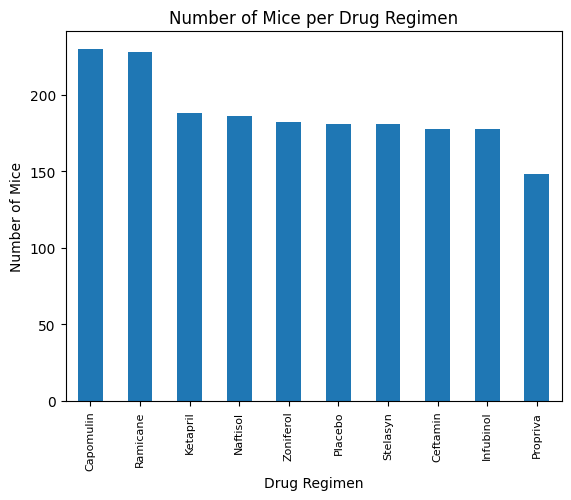

In [8]:
	
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Select only columns wanted for this chart
drug_regimen_data = clean_df.groupby(['Drug Regimen'])
timepoint_data = drug_regimen_data['Timepoint'].count().sort_values(ascending=False)

# Create bar chart and title
figure1 = timepoint_data.plot(kind="bar",
                              title="Number of Mice per Drug Regimen")

# Add chart labels
figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel("Number of Mice")

# Configure x-ticks
xticklabels = timepoint_data.index
figure1.set_xticklabels(xticklabels, rotation=90, fontsize=8)

plt.tight_layout
plt.show()

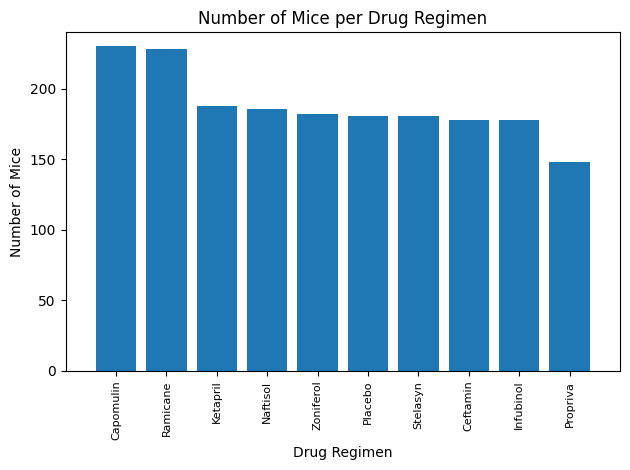

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Use filtered data from previous chart
x_axis = np.arange(len(timepoint_data))

# Create a bar chart based on the above data and set ticks
figure2 = plt.bar(x_axis, timepoint_data.sort_values(ascending=False), align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoint_data.index, rotation="vertical", fontsize=8)

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(timepoint_data)+10)

# Add title and labels to the chart
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.show()

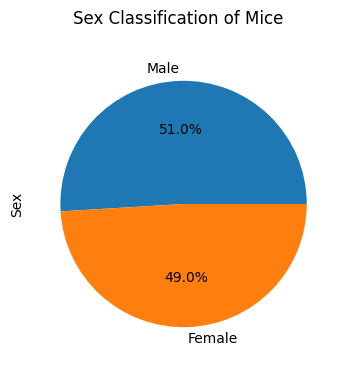

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filter the dataframe only to the data needed for the chart
sex = clean_df['Sex'].value_counts()

# Use the filtered data to create a pie chart and add title
figure3 = sex.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%", figsize=(4,4), subplots=True, fontsize=10, title="Sex Classification of Mice")

plt.show()

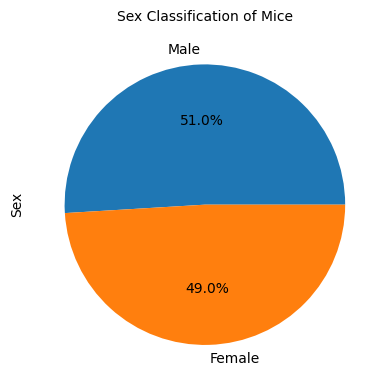

In [36]:
# # Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create the chart using filtered data from previous chart
# Add title and labels to the chart
plt.figure(figsize=(4,4))
plt.pie(sex, labels=('Male', 'Female'), autopct='%1.1f%%')
plt.title("Sex Classification of Mice",fontsize = 10)
plt.ylabel('Sex', size=10)
plt.tight_layout()

plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_df = clean_df.groupby(clean_df['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_size_regimen_df = pd.merge(clean_df, group_df, on=('Mouse ID', 'Timepoint'), how='right')
tumor_size_regimen_df.reset_index(drop=True)
tumor_size_regimen_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_size_capomulin = []
tumor_size_ramicane = []
tumor_size_infubinol = []
tumor_size_ceftamin = []

for i in range(len(tumor_size_regimen_df)-1):
    if tumor_size_regimen_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_size_capomulin.append(tumor_size_regimen_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_size_regimen_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_size_ramicane.append(tumor_size_regimen_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_size_regimen_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_size_infubinol.append(tumor_size_regimen_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_size_regimen_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_size_ceftamin.append(tumor_size_regimen_df.loc[i, "Tumor Volume (mm3)"])

# Put four tumor vol lists into a list for for loop
tumor_size = [tumor_size_capomulin, tumor_size_ramicane, tumor_size_infubinol, tumor_size_ceftamin]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []
for i in range(len(tumor_size)):
    quartiles = pd.Series(tumor_size[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{regimens[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    for j in range(len(tumor_size[i])):
        if (tumor_size[i][j] < lower_bound) or (tumor_size[i][j] > upper_bound):
            outlier = tumor_size[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")
    



Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [np.float64(36.3213458)].



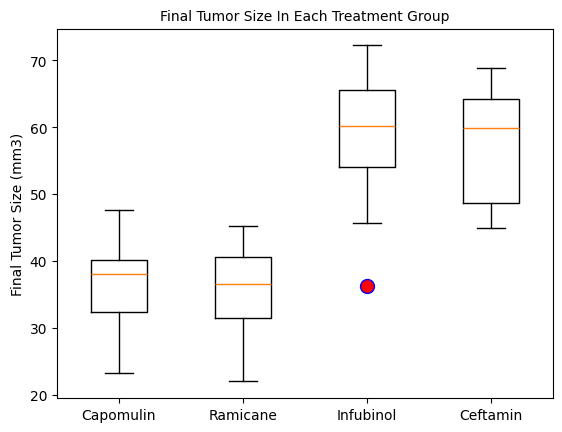

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

marker = dict(markerfacecolor='r', markersize=10, markeredgecolor='b')
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Size (mm3)")
ax1.boxplot(tumor_size, flierprops=marker)
ax1.set_title("Final Tumor Size In Each Treatment Group", fontsize = 10)
ax1.set_xticklabels(regimens)

plt.show()

## Line and Scatter Plots

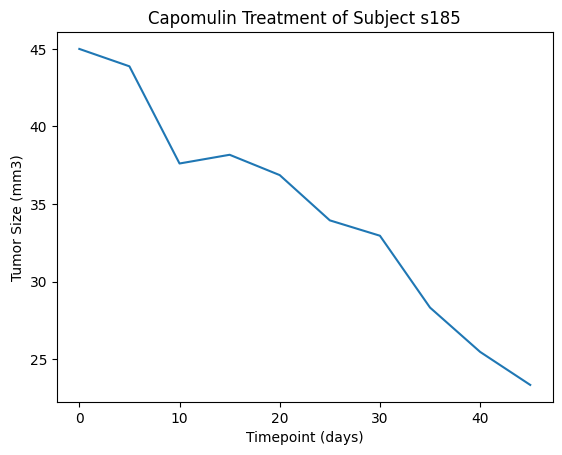

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Get the data for Timepoint and Tumor Volume for mouse l509 
    # Note: Mouse ID 'l509' is used for this data as it was mentioned in the started code file provided.
line_data = clean_df.loc[clean_df["Mouse ID"] == "s185"]
timepoint = line_data["Timepoint"]
tumor_size = line_data["Tumor Volume (mm3)"]

# Plot the data
figure6 = plt.plot(timepoint, tumor_size)

# Add chart title and labels
plt.title("Capomulin Treatment of Subject s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Size (mm3)")

# Show the chart
plt.show()

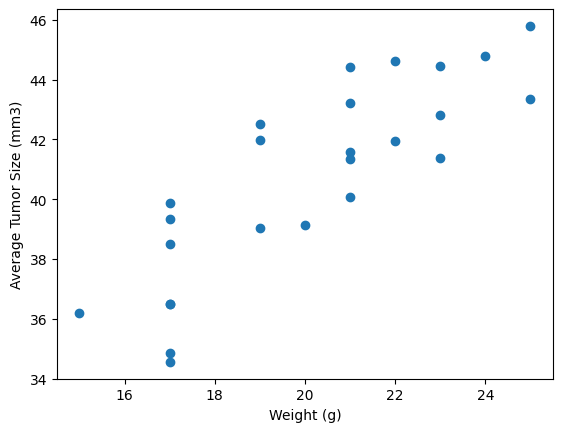

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [89]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = data_df.loc[data_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_size_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_size_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")

plt.show()
avg_tumor_size_capomulin

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


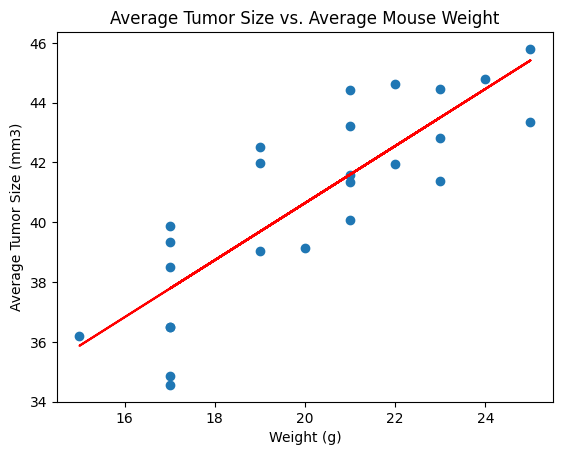

In [92]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(mouse_weight, avg_tumor_size_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_size_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_size_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.title("Average Tumor Size vs. Average Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()